In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

Passenger data from year 1949 to 1960

<AxesSubplot: xlabel='Month'>

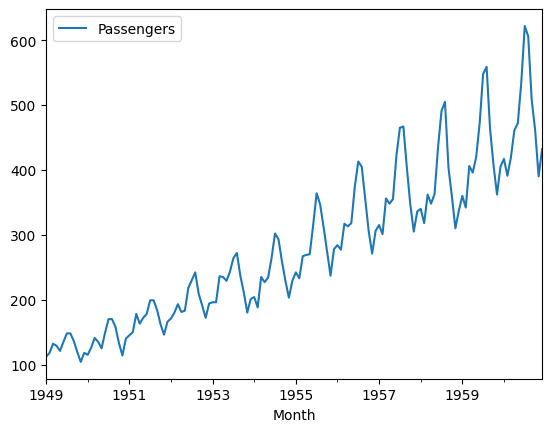

In [115]:
air_passengers_data = pd.read_csv('AirPassengers.csv')
air_passengers_data = air_passengers_data.rename(columns={'#Passengers':'Passengers'})
air_passengers_data['Month'] = pd.to_datetime(air_passengers_data['Month'])
air_passengers_data.set_index('Month', inplace=True)
air_passengers_data.plot()

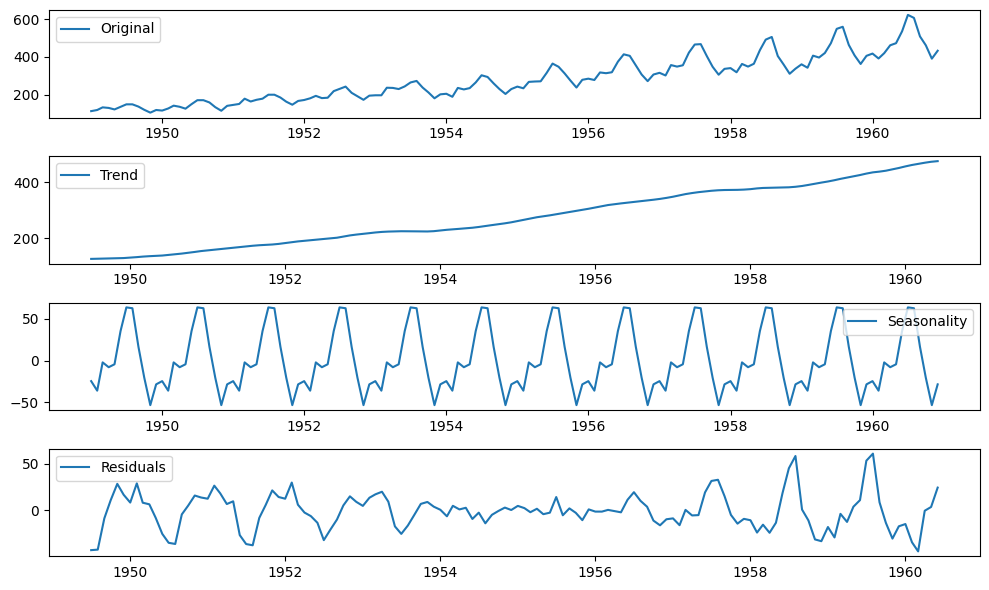

In [116]:
decomposition = seasonal_decompose(air_passengers_data, period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(air_passengers_data['Passengers'], label='Original')
plt.legend(loc='best')
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

####  the autocorrelation function (ACF) of the passenger data

<StemContainer object of 3 artists>

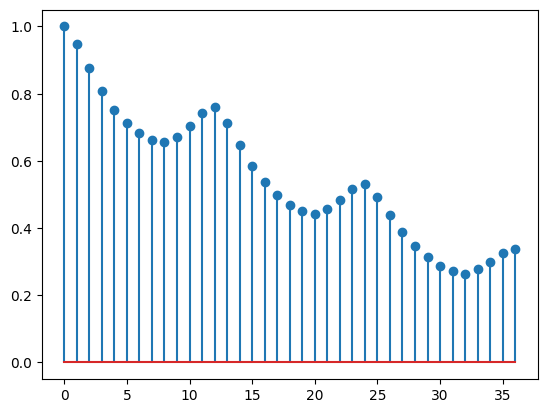

In [117]:
passengers_data = air_passengers_data['Passengers']
passengers_acf = sm.tsa.stattools.acf(passengers_data,nlags=36)
plt.stem(range(0,len(passengers_acf)),passengers_acf)

#### Removing trend and seasonality

<AxesSubplot: xlabel='Month'>

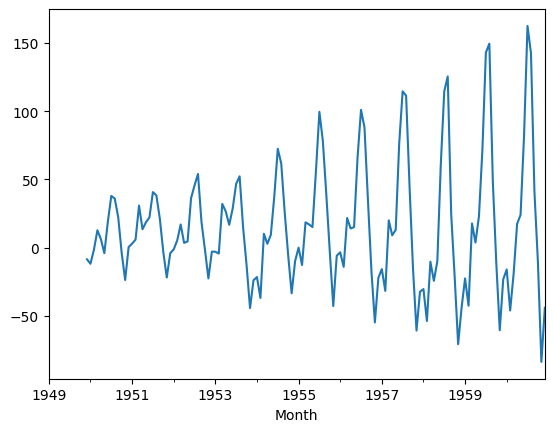

In [118]:
rolling_mean = passengers_data.rolling(window=12).mean()
data_no_trend = passengers_data - rolling_mean
data_no_trend.plot()

ACF of the detrended data

<StemContainer object of 3 artists>

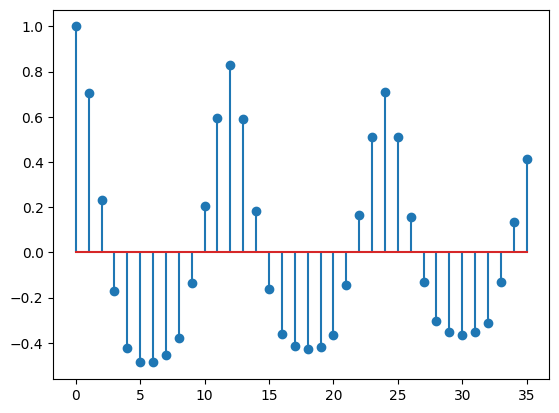

In [119]:
data_no_trend = data_no_trend[data_no_trend.notnull()]
acf = sm.tsa.stattools.acf(data_no_trend,nlags=35)
plt.stem(range(0,len(acf)),acf)

removing seasonality by differencing the data with a lag of 12 months

<AxesSubplot: xlabel='Month'>

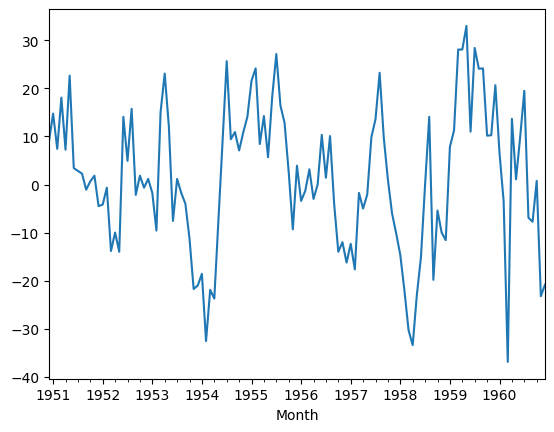

In [120]:
data_cleared = data_no_trend.diff(periods=12)
data_cleared = data_cleared[data_cleared.notnull()]
data_cleared.plot()

<StemContainer object of 3 artists>

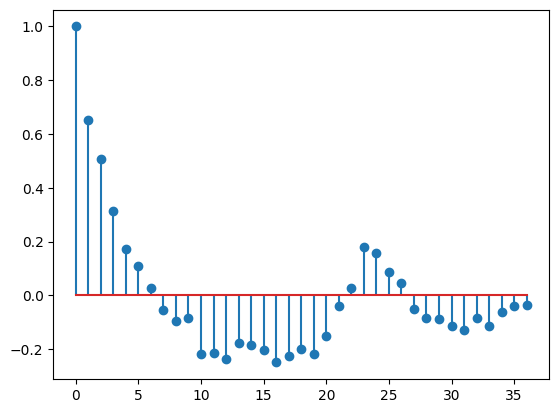

In [121]:
acf = sm.tsa.stattools.acf(data_cleared,nlags=36)
plt.stem(range(0,len(acf)),acf)

Augmented Dickey-Fuller (ADF) test to check for stationarity

In [122]:
test_results = adfuller(data_cleared)
print('ADF Statistic: ', test_results[0])
print('P-Value: ', test_results[1])

ADF Statistic:  -3.644610845149137
P-Value:  0.004963255467428215


c:\Users\dovil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dovil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dovil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


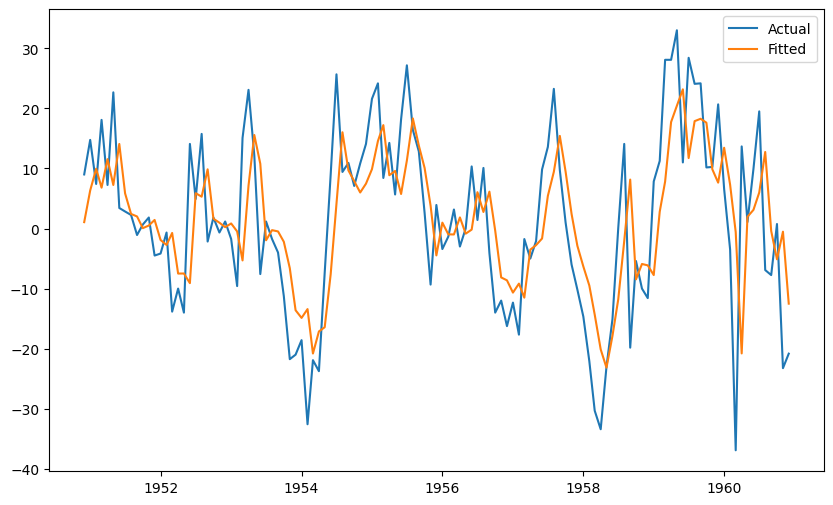

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  121
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -461.961
Date:                Sun, 16 Jul 2023   AIC                            931.923
Time:                        15:34:16   BIC                            943.106
Sample:                    12-01-1950   HQIC                           936.464
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0607      3.547      0.299      0.765      -5.891       8.012
ar.L1          0.5561      0.077      7.248      0.000       0.406       0.706
ar.L2          0.1609      0.095      1.687      0.0

In [123]:
model = sm.tsa.ARIMA(data_cleared, order=(2, 0, 0))

results = model.fit()

plt.figure(figsize=(10, 6))
plt.plot(data_cleared, label='Actual')
plt.plot(results.fittedvalues, label='Fitted')
plt.legend(loc='best')
plt.show()

print(results.summary())

The original passenger data fitted with the best ARIMA model to it.

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -702.819
Date:                Sun, 16 Jul 2023   AIC                           1413.639
Time:                        15:34:16   BIC                           1425.518
Sample:                    01-01-1949   HQIC                          1418.466
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.2991     54.518      5.141      0.000     173.445     387.153
ar.L1          1.2831      0.079     16.316      0.000       1.129       1.437
ar.L2         -0.3322      0.082     -4.054      0.0

c:\Users\dovil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dovil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dovil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


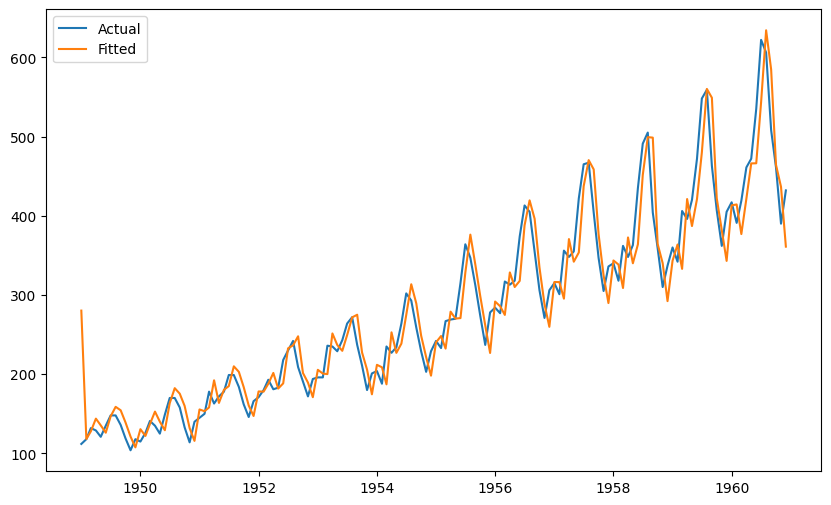

In [124]:
model = sm.tsa.ARIMA(air_passengers_data['Passengers'], order=(2, 0, 0))
plt.show()

results = model.fit()

print(results.summary())

plt.figure(figsize=(10, 6))
plt.plot(air_passengers_data['Passengers'], label='Actual')
plt.plot(results.fittedvalues, label='Fitted')
plt.legend(loc='best')
plt.show()

SARIMA model

c:\Users\dovil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dovil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                           Passengers   No. Observations:                  144
Model:             SARIMAX(2, 0, 0)x(1, 1, [1], 12)   Log Likelihood                -509.545
Date:                              Sun, 16 Jul 2023   AIC                           1029.090
Time:                                      15:34:17   BIC                           1043.504
Sample:                                  01-01-1949   HQIC                          1034.947
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6091      0.074      8.211      0.000       0.464       0.754
ar.L2          0.31

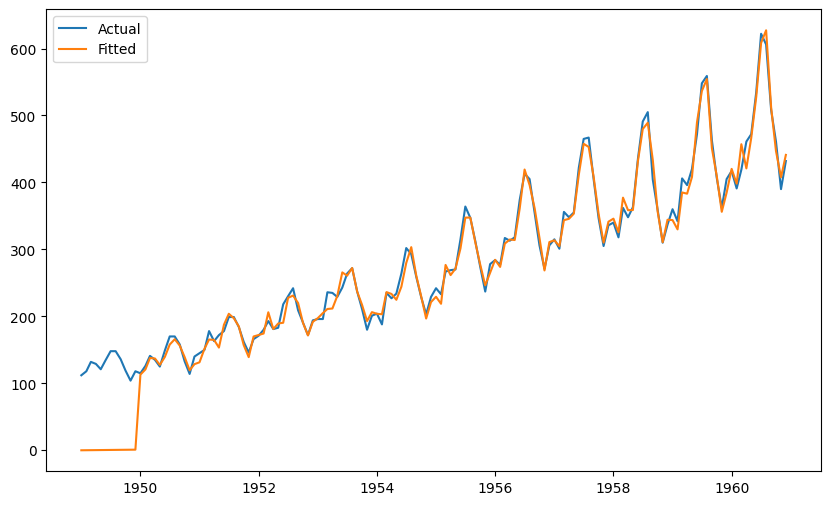

In [125]:
model = sm.tsa.SARIMAX(air_passengers_data['Passengers'], order=(2, 0, 0), seasonal_order=(1, 1, 1, 12))
results = model.fit()

print(results.summary())

plt.figure(figsize=(10, 6))
plt.plot(air_passengers_data['Passengers'], label='Actual')
plt.plot(results.fittedvalues, label='Fitted')
plt.legend(loc='best')
plt.show()


forecast for the next 12 months




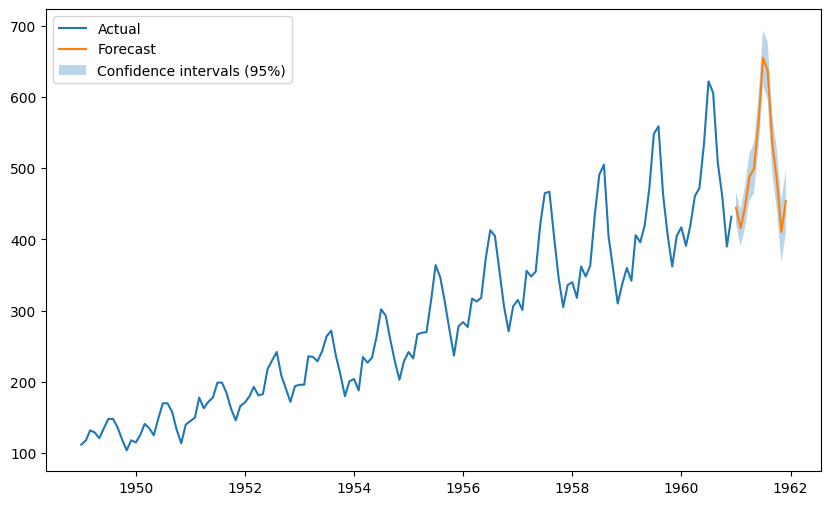

In [126]:
forecast = results.get_forecast(steps=12)

forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

plt.figure(figsize=(10, 6))
plt.plot(air_passengers_data['Passengers'], label='Actual')
plt.plot(forecast_values, label='Forecast')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], alpha=0.3,  label='Confidence intervals (95%)')
plt.legend(loc='best')
plt.show()

# Individual household electric power consumption

<AxesSubplot: xlabel='Date_Time'>

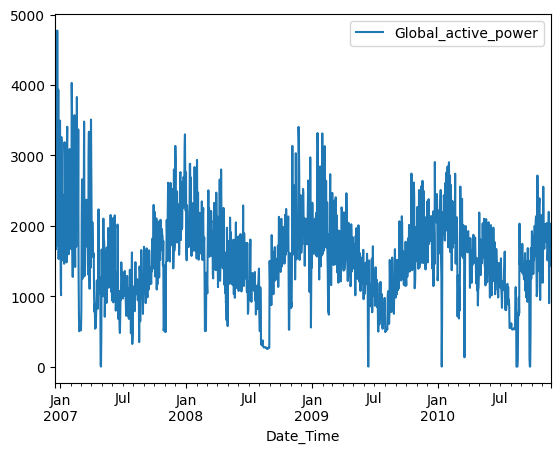

In [127]:
# https://archive.ics.uci.edu/power_consumptionset/235/individual+household+electric+power+consumption
power_consumption = pd.read_csv(r'C:\Users\dovil\Desktop\she goes tech\household_power_consumption.txt', sep=';', parse_dates=[['Date', 'Time']], infer_datetime_format=True, low_memory=False, na_values=['?'])
power_consumption.set_index('Date_Time', inplace=True)

power_consumption = power_consumption[['Global_active_power']]
power_consumption = power_consumption.dropna()
power_consumption = power_consumption.resample('D').sum()
power_consumption.plot()

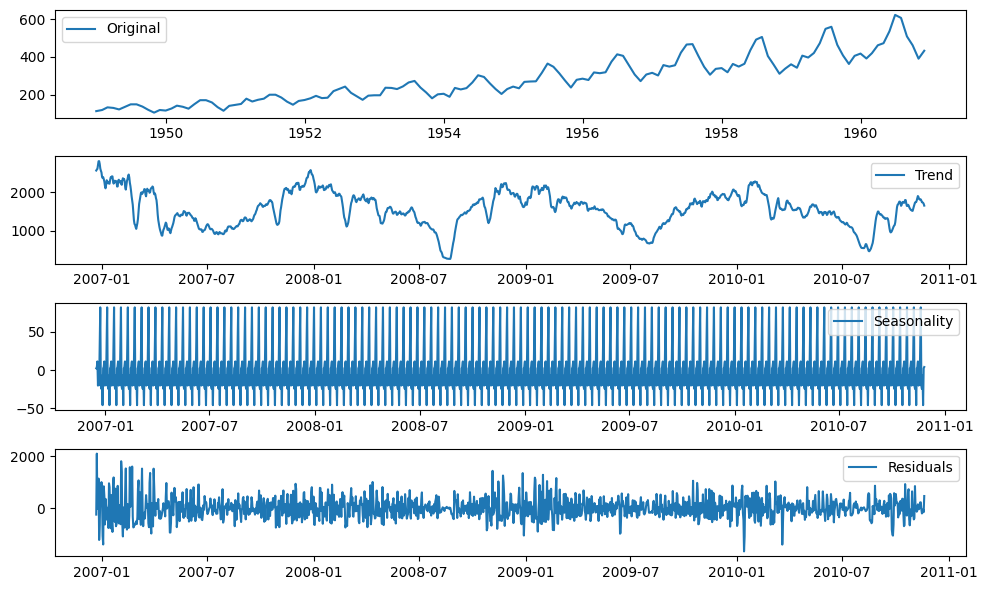

In [128]:
decomposition = seasonal_decompose(power_consumption, period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(air_passengers_data['Passengers'], label='Original')
plt.legend(loc='best')
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<StemContainer object of 3 artists>

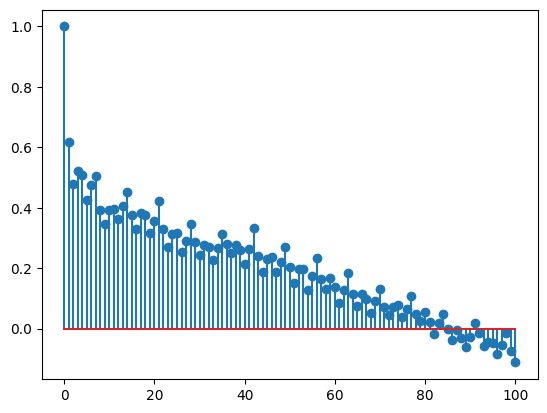

In [129]:
power_consumption = power_consumption[['Global_active_power']]
power_consumption_acf = sm.tsa.stattools.acf(power_consumption,nlags=100)
plt.stem(range(0,len(power_consumption_acf)),power_consumption_acf)

ADF Statistic:  -12.293965437070907
P-Value:  7.713992257966826e-23


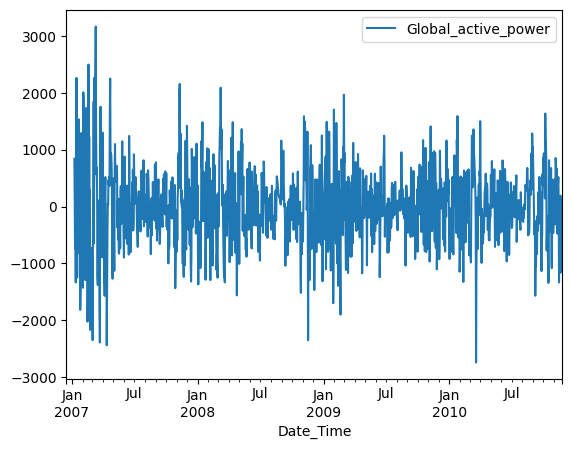

In [139]:
rolling_mean_pwr = power_consumption.rolling(window=12).mean()
data_no_trend_pwr = power_consumption - rolling_mean_pwr

data_cleared_pwr = data_no_trend_pwr.diff(periods=12)
data_cleared_pwr = data_cleared_pwr[data_cleared_pwr.notnull()]
data_cleared_pwr.plot()

data_cleared_pwr = data_cleared_pwr.replace([np.inf, -np.inf], np.nan)
data_cleared_pwr = data_cleared_pwr.dropna()

test_results_pwr = adfuller(data_cleared_pwr)
print('ADF Statistic: ', test_results_pwr[0])
print('P-Value: ', test_results_pwr[1])

In [132]:
model = sm.tsa.SARIMAX(power_consumption['Global_active_power'], order=(2, 1, 2), seasonal_order=(2, 1, 2, 7))  # Adjust the orders and seasonal orders as needed
results = model.fit()

print(results.summary())

c:\Users\dovil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\dovil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\dovil\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:               Global_active_power   No. Observations:                 1442
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 7)   Log Likelihood              -10788.899
Date:                           Sun, 16 Jul 2023   AIC                          21595.798
Time:                                   15:34:53   BIC                          21643.212
Sample:                               12-16-2006   HQIC                         21613.501
                                    - 11-26-2010                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3762      0.031     44.204      0.000       1.315       1.437
ar.L2         -0.3823      0.028    -13.448

Forecast for 90 days

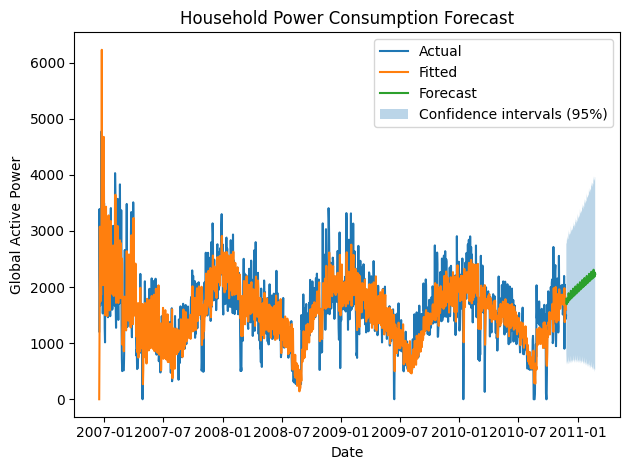

In [140]:
forecast = results.get_forecast(steps=90)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

plt.plot(power_consumption.index, power_consumption['Global_active_power'], label='Actual')
plt.plot(results.fittedvalues, label='Fitted')
plt.plot(forecast_values.index, forecast_values, label='Forecast')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], alpha=0.3, label='Confidence intervals (95%)')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.title('Household Power Consumption Forecast')
plt.legend()
plt.tight_layout()
plt.show()